# Practica 2.1
## Juan Latasa, David Arranz, Jesus tejada y Marcos Rodríguez
## Perceptron

In [124]:
#declaración de librerías
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(45) #declaramos una semilla para que nos de los mismo resultados

Aqui lo que hace es crear un DataFrame, para posteriormente representar la tabla que se nos pide.

Ponemos las columnas correspondientes.

In [125]:
df = pd.DataFrame(columns=['Epoch', 'Entradas',"Pesos iniciales",'Desired Output Yr',"Actual output Yd","Error","Pesos finales"])
df

,Epoch,Entradas,Pesos iniciales,Desired Output Yr,Actual output Yd,Error,Pesos finales


In [126]:
learn_rate=0.1 #declaramoa el learning rate
Umbral=0.2 #declaramos el umbral

In [127]:
np.random.seed(45) #declaramos una semilla para que nos de los mismo resultados
pesos=2 * np.random.random((2,1)) - 1 #inicilaizamos los pesos, los cuales van a ir de -1 a 1
Inipesos=pesos
pesos

array([[0.97802303],
       [0.09908945]])

### Función de activación

In [128]:
def funcionActivacion(S,Umbral):
    if S>=Umbral:
        return 1
    else:
        return 0

### Representación ecuación general

In [129]:
def pintamos(i,Func):
    if Func:
        plt.plot([0,0,1],[0,1,0],'o', color='blue');
        plt.plot([1],[1],'o', color='red');
    else:
        plt.plot([0,1],[1,0],'o', color='red');
        plt.plot([0,1],[0,1],'o', color='blue');        
    pendiente=0
    OrdenadaOrigen=0
    if pesos[1]!=0:
        pendiente=-(pesos[0]/pesos[1])
        OrdenadaOrigen=Umbral/pesos[1]
    
    plt.plot([-2,2],[pendiente*-2 + OrdenadaOrigen,pendiente*2 + OrdenadaOrigen], color='green')
    axes = plt.gca()
    axes.set_xlim([-0.1,1.1])
    axes.set_ylim([-0.1,1.1])
    plt.title("Epoch: " +str (i+1))
    plt.show()
    print("Ecuación del hiperplano: {:.2f}*x + {:.2f}".format(pendiente[0],OrdenadaOrigen[0]))

### Entrenamiento Red Neuronal

In [130]:
def entrenar(entradas,salidas,epoch,FAnd):
    global pesos
    ErroresEpoch=[]
    for i in range(epoch):
        errorM=0.0
        for x in range(entradas.shape[0]):
            S=np.dot(entradas[x],pesos)
            y=funcionActivacion(S[0],Umbral)
            error=salidas[x]-y
            errorM+=abs(error[0])
            pesosI=pesos.copy()
            pesos=pesos+np.array([learn_rate*entradas[x]*error]).T
            df.loc[df.shape[0]]=i+1,str(entradas[x]),np.round(pesosI,decimals=4),salidas[x][0],y,error[0],np.round(pesos.copy(),decimals=4)
        #pesos+=learn_rate*np.dot(entradas.T,error)
        errorM/=entradas.shape[0]
        ErroresEpoch.append(errorM)
        pintamos(i,FAnd)    
        if errorM==0:
            return i,ErroresEpoch
    return i,ErroresEpoch


### Clasificación

In [131]:
def clasificacion(entradas):
    S=np.dot(entradas,pesos)
    print(funcionActivacion(S[0],Umbral))

### Función AND

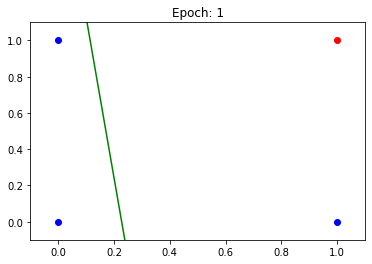

Ecuación del hiperplano: -8.86*x + 2.02


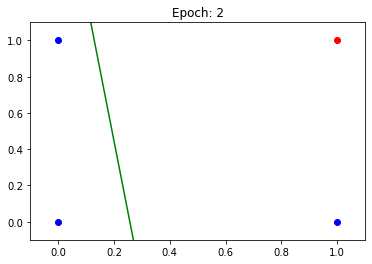

Ecuación del hiperplano: -7.85*x + 2.02


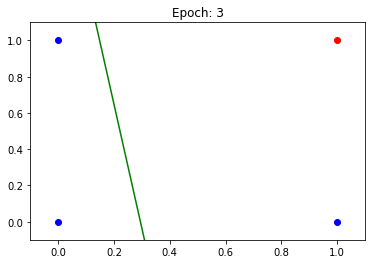

Ecuación del hiperplano: -6.84*x + 2.02


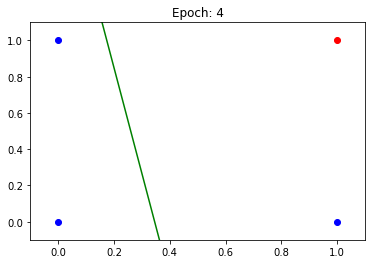

Ecuación del hiperplano: -5.83*x + 2.02


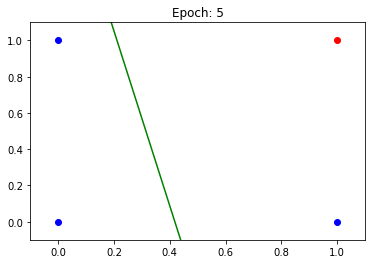

Ecuación del hiperplano: -4.82*x + 2.02


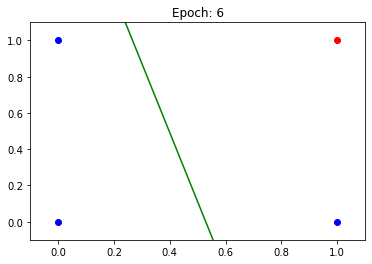

Ecuación del hiperplano: -3.81*x + 2.02


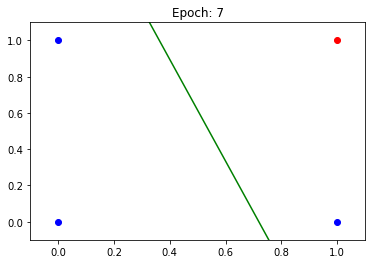

Ecuación del hiperplano: -2.81*x + 2.02


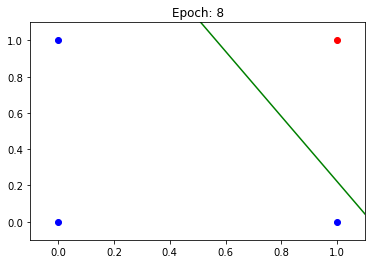

Ecuación del hiperplano: -1.80*x + 2.02


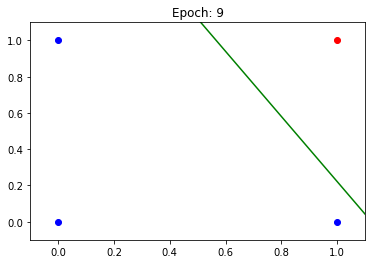

Ecuación del hiperplano: -1.80*x + 2.02


array([[0.17802303],
       [0.09908945]])

In [132]:
entradas=np.array([[0,0],[0,1],[1,0],[1,1]])
salidas=np.array([[0],[0],[0],[1]])

periodo=100
EpochNecesarios,ErroresEpoch=entrenar(entradas,salidas,periodo,True)
pesos


In [133]:
df2=df.set_index(["Epoch","Entradas"])
df2.sort_index(inplace=True)
df2

Pesos iniciales Desired Output Yr Actual output Yd Error  \
Epoch Entradas                                                                 
1     [0 0]     [[0.978], [0.0991]]                 0                0     0   
      [0 1]     [[0.978], [0.0991]]                 0                0     0   
      [1 0]     [[0.978], [0.0991]]                 0                1    -1   
      [1 1]     [[0.878], [0.0991]]                 1                1     0   
2     [0 0]     [[0.878], [0.0991]]                 0                0     0   
      [0 1]     [[0.878], [0.0991]]                 0                0     0   
      [1 0]     [[0.878], [0.0991]]                 0                1    -1   
      [1 1]     [[0.778], [0.0991]]                 1                1     0   
3     [0 0]     [[0.778], [0.0991]]                 0                0     0   
      [0 1]     [[0.778], [0.0991]]                 0                0     0   
      [1 0]     [[0.778], [0.0991]]                 0                1    -1   
      [1 1]     [[0.678], [0.0991]]                 1                1     0   
4     [0 0]     [[0.678], [0.0991]]                 0                0     0   
      [0 1]     [[0.678], [0.0991]]                 0                0     0   
      [1 0]     [[0.678], [0.0991]]                 0                1    -1   
      [1 1]     [[0.578], [0.0991]]                 1                1     0   
5     [0 0]     [[0.578], [0.0991]]                 0                0     0   
      [0 1]     [[0.578], [0.0991]]                 0                0     0   
      [1 0]     [[0.578], [0.0991]]                 0                1    -1   
      [1 1]     [[0.478], [0.0991]]                 1                1     0   
6     [0 0]     [[0.478], [0.0991]]                 0                0     0   
      [0 1]     [[0.478], [0.0991]]                 0                0     0   
      [1 0]     [[0.478], [0.0991]]                 0                1    -1   
      [1 1]     [[0.378], [0.0991]]                 1                1     0   
7     [0 0]     [[0.378], [0.0991]]                 0                0     0   
      [0 1]     [[0.378], [0.0991]]                 0                0     0   
      [1 0]     [[0.378], [0.0991]]                 0                1    -1   
      [1 1]     [[0.278], [0.0991]]                 1                1     0   
8     [0 0]     [[0.278], [0.0991]]                 0                0     0   
      [0 1]     [[0.278], [0.0991]]                 0                0     0   
      [1 0]     [[0.278], [0.0991]]                 0                1    -1   
      [1 1]     [[0.178], [0.0991]]                 1                1     0   
9     [0 0]     [[0.178], [0.0991]]                 0                0     0   
      [0 1]     [[0.178], [0.0991]]                 0                0     0   
      [1 0]     [[0.178], [0.0991]]                 0                0     0   
      [1 1]     [[0.178], [0.0991]]                 1                1     0   

                      Pesos finales  
Epoch Entradas                       
1     [0 0]     [[0.978], [0.0991]]  
      [0 1]     [[0.978], [0.0991]]  
      [1 0]     [[0.878], [0.0991]]  
      [1 1]     [[0.878], [0.0991]]  
2     [0 0]     [[0.878], [0.0991]]  
      [0 1]     [[0.878], [0.0991]]  
      [1 0]     [[0.778], [0.0991]]  
      [1 1]     [[0.778], [0.0991]]  
3     [0 0]     [[0.778], [0.0991]]  
      [0 1]     [[0.778], [0.0991]]  
      [1 0]     [[0.678], [0.0991]]  
      [1 1]     [[0.678], [0.0991]]  
4     [0 0]     [[0.678], [0.0991]]  
      [0 1]     [[0.678], [0.0991]]  
      [1 0]     [[0.578], [0.0991]]  
      [1 1]     [[0.578], [0.0991]]  
5     [0 0]     [[0.578], [0.0991]]  
      [0 1]     [[0.578], [0.0991]]  
      [1 0]     [[0.478], [0.0991]]  
      [1 1]     [[0.478], [0.0991]]  
6     [0 0]     [[0.478], [0.0991]]  
      [0 1]     [[0.478], [0.0991]]  
      [1 0]     [[0.378], [0.0991]]  
      [1 1]     [[0.378], [0.

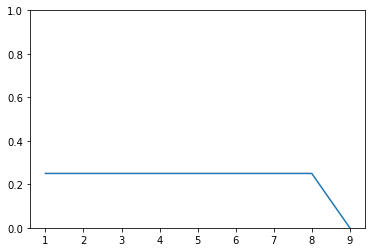

In [134]:
plt.plot(np.arange(EpochNecesarios+1)+1,ErroresEpoch)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [135]:
clasificacion(np.array([0,0]))
clasificacion(np.array([0,1]))
clasificacion(np.array([1,0]))
clasificacion(np.array([1,1]))

0
0
0
1


### Funcion XOR

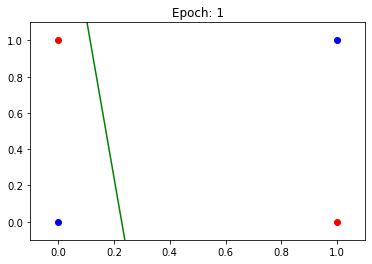

Ecuación del hiperplano: -8.86*x + 2.02


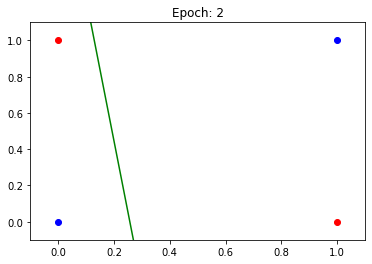

Ecuación del hiperplano: -7.85*x + 2.02


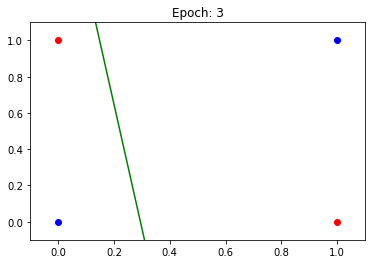

Ecuación del hiperplano: -6.84*x + 2.02


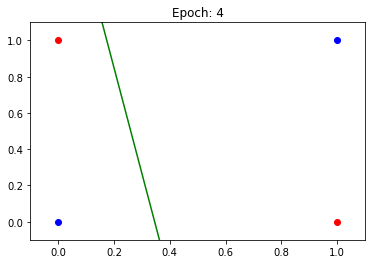

Ecuación del hiperplano: -5.83*x + 2.02


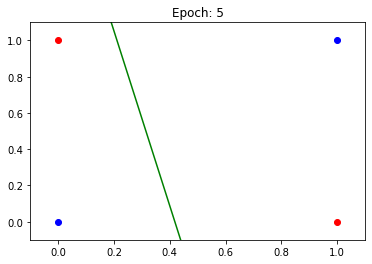

Ecuación del hiperplano: -4.82*x + 2.02


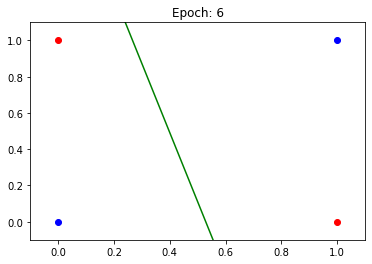

Ecuación del hiperplano: -3.81*x + 2.02


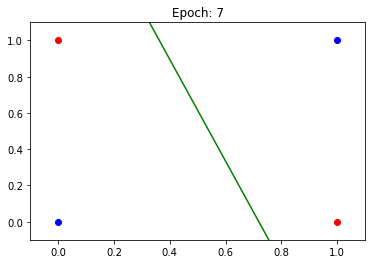

Ecuación del hiperplano: -2.81*x + 2.02


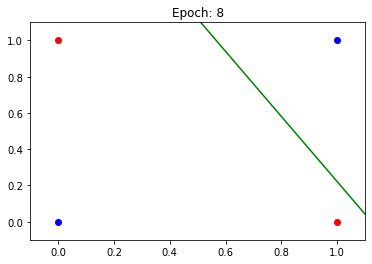

Ecuación del hiperplano: -1.80*x + 2.02


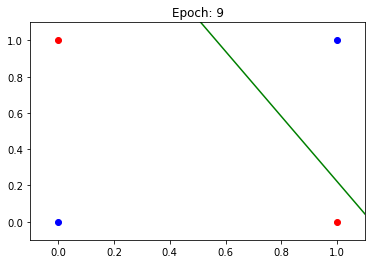

Ecuación del hiperplano: -1.80*x + 2.02


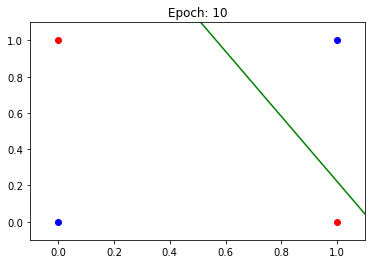

Ecuación del hiperplano: -1.80*x + 2.02


array([[0.17802303],
       [0.09908945]])

In [136]:
pesos=Inipesos
df.drop(df.index, inplace=True)
entradas=np.array([[0,0],[0,1],[1,0],[1,1]])
salidas=np.array([[0],[1],[1],[0]])

periodo=10
EpochNecesariosXOR,ErroresEpochXOR=entrenar(entradas,salidas,periodo,False)
pesos

In [137]:
df2=df.set_index(["Epoch","Entradas"])
df2.sort_index(inplace=True)
df2

Pesos iniciales Desired Output Yr Actual output Yd Error  \
Epoch Entradas                                                                 
1     [0 0]     [[0.978], [0.0991]]                 0                0     0   
      [0 1]     [[0.978], [0.0991]]                 1                0     1   
      [1 0]     [[0.978], [0.1991]]                 1                1     0   
      [1 1]     [[0.978], [0.1991]]                 0                1    -1   
2     [0 0]     [[0.878], [0.0991]]                 0                0     0   
      [0 1]     [[0.878], [0.0991]]                 1                0     1   
      [1 0]     [[0.878], [0.1991]]                 1                1     0   
      [1 1]     [[0.878], [0.1991]]                 0                1    -1   
3     [0 0]     [[0.778], [0.0991]]                 0                0     0   
      [0 1]     [[0.778], [0.0991]]                 1                0     1   
      [1 0]     [[0.778], [0.1991]]                 1                1     0   
      [1 1]     [[0.778], [0.1991]]                 0                1    -1   
4     [0 0]     [[0.678], [0.0991]]                 0                0     0   
      [0 1]     [[0.678], [0.0991]]                 1                0     1   
      [1 0]     [[0.678], [0.1991]]                 1                1     0   
      [1 1]     [[0.678], [0.1991]]                 0                1    -1   
5     [0 0]     [[0.578], [0.0991]]                 0                0     0   
      [0 1]     [[0.578], [0.0991]]                 1                0     1   
      [1 0]     [[0.578], [0.1991]]                 1                1     0   
      [1 1]     [[0.578], [0.1991]]                 0                1    -1   
6     [0 0]     [[0.478], [0.0991]]                 0                0     0   
      [0 1]     [[0.478], [0.0991]]                 1                0     1   
      [1 0]     [[0.478], [0.1991]]                 1                1     0   
      [1 1]     [[0.478], [0.1991]]                 0                1    -1   
7     [0 0]     [[0.378], [0.0991]]                 0                0     0   
      [0 1]     [[0.378], [0.0991]]                 1                0     1   
      [1 0]     [[0.378], [0.1991]]                 1                1     0   
      [1 1]     [[0.378], [0.1991]]                 0                1    -1   
8     [0 0]     [[0.278], [0.0991]]                 0                0     0   
      [0 1]     [[0.278], [0.0991]]                 1                0     1   
      [1 0]     [[0.278], [0.1991]]                 1                1     0   
      [1 1]     [[0.278], [0.1991]]                 0                1    -1   
9     [0 0]     [[0.178], [0.0991]]                 0                0     0   
      [0 1]     [[0.178], [0.0991]]                 1                0     1   
      [1 0]     [[0.178], [0.1991]]                 1                0     1   
      [1 1]     [[0.278], [0.1991]]                 0                1    -1   
10    [0 0]     [[0.178], [0.0991]]                 0                0     0   
      [0 1]     [[0.178], [0.0991]]                 1                0     1   
      [1 0]     [[0.178], [0.1991]]                 1                0     1   
      [1 1]     [[0.278], [0.1991]]                 0                1    -1   

                      Pesos finales  
Epoch Entradas                       
1     [0 0]     [[0.978], [0.0991]]  
      [0 1]     [[0.978], [0.1991]]  
      [1 0]     [[0.978], [0.1991]]  
      [1 1]     [[0.878], [0.0991]]  
2     [0 0]     [[0.878], [0.0991]]  
      [0 1]     [[0.878], [0.1991]]  
      [1 0]     [[0.878], [0.1991]]  
      [1 1]     [[0.778], [0.0991]]  
3     [0 0]     [[0.778], [0.0991]]  
      [0 1]     [[0.778], [0.1991]]  
      [1 0]     [[0.778], [0.1991]]  
      [1 1]     [[0.678], [0.0991]]  
4     [0 0]     [[0.678], [0.0991]]  
      [0 1]     [[0.678], [0.1991]]  
      [1 0]     [[0.678], [0.1991]]  
      [1 1]  

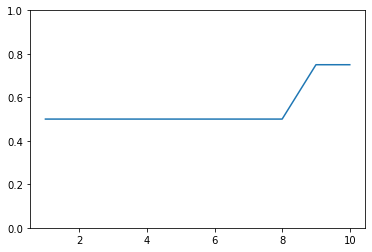

In [138]:
plt.plot(np.arange(EpochNecesariosXOR+1)+1,ErroresEpochXOR)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [139]:
clasificacion(np.array([0,0]))
clasificacion(np.array([0,1]))
clasificacion(np.array([1,0]))
clasificacion(np.array([1,1]))

0
0
0
1
